In [1]:
# CODE IN PLACE PROJECT WORK

# MARKO KARTTUNEN

In [2]:
# Data Science topic

# The objective was to get a quick update on Covid situation in the US.

# Dataset: JHU CSSE COVID-19 Dataset 2021-06-03

# Dataset downloaded on June, 4th, 2021

# Analysis done 2021-06-04

# https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

In [3]:
# Data Science top three questions

# Counting the number of most and least deaths in States

# Counting sum of confirmed, deaths, recovered to total test results

# Plotting deaths and confirmed cases to total test results by percentage

In [4]:
# Setting up libraries

import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

In [5]:
# Loading dataset

df = pd.read_csv("Covid data USA.csv")
df.tail(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
53,Virginia,US,2021-06-03 04:31:34,37.7693,-78.1700,675783,11206,NaN,NaN,51.0,7917.304150,7434632.0,NaN,1.658225,84000051.0,USA,87102.283997,NaN
54,Washington,US,2021-06-03 04:31:34,47.4009,-121.4905,437677,5801,NaN,NaN,53.0,5747.644780,7189495.0,NaN,1.325407,84000053.0,USA,94413.605024,NaN
55,West Virginia,US,2021-06-03 04:31:34,38.4912,-80.9545,161967,2800,NaN,NaN,54.0,9037.595688,2958556.0,NaN,1.728747,84000054.0,USA,165084.448988,NaN
56,Wisconsin,US,2021-06-03 04:31:34,44.2685,-89.6165,674739,7894,NaN,NaN,55.0,11588.607101,8755325.0,NaN,1.169934,84000055.0,USA,150372.249819,NaN
57,Wyoming,US,2021-06-03 04:31:34,42.7560,-107.3025,60447,720,NaN,NaN,56.0,10444.243632,759823.0,NaN,1.191126,84000056.0,USA,131284.869868,NaN


In [6]:
# Counting most deaths
# TOP States are California, New York and Texas

df[['Deaths','Province_State']][df['Deaths']>10000].sort_values(by='Deaths', ascending=False)

,Deaths,Province_State
5,63294,California
36,53338,New York
49,51575,Texas
11,36924,Florida
43,27259,Pennsylvania
34,26247,New Jersey
17,25241,Illinois
12,20867,Georgia
26,20423,Michigan
40,19923,Ohio


In [7]:
# Taking closer look at top three States by deaths

df.nlargest(n=3, columns='Deaths')

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
5,California,US,2021-06-03 07:31:26,36.1162,-119.6816,3791889,63294,NaN,NaN,6.0,9596.749340,65858455.0,NaN,1.669194,84000006.0,USA,166678.688263,NaN
36,New York,US,2021-06-03 04:31:34,42.1657,-74.9481,2103269,53338,NaN,NaN,36.0,10811.742899,55977791.0,NaN,2.535957,84000036.0,USA,287750.869879,NaN
49,Texas,US,2021-06-03 04:31:34,31.0545,-97.5635,2956576,51575,NaN,NaN,48.0,10196.537915,24568766.0,NaN,1.744417,84000048.0,USA,84731.917613,NaN


In [8]:
# # Taking closer look at least three States by deaths

df.nsmallest(n=3, columns='Deaths')

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
2,American Samoa,US,2021-06-03 04:31:34,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,2140.0,NaN,NaN,16.0,ASM,3846.084722,NaN
9,Diamond Princess,US,2021-06-03 04:31:34,NaN,NaN,49,0,NaN,NaN,88888.0,NaN,NaN,NaN,0.000000,84088888.0,USA,NaN,NaN
39,Northern Mariana Islands,US,2021-06-03 04:31:34,15.0979,145.6739,183,2,NaN,NaN,69.0,331.858407,17542.0,NaN,1.092896,580.0,MNP,31811.257798,NaN


In [9]:
# Province_State into index

df = df.set_index('Province_State')
df

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
Province_State,,,,,,,,,,,,,,,,,
Alabama,US,2021-06-03 04:31:34,32.3182,-86.9023,544598,11167,NaN,NaN,1.0,11107.025331,2611777.0,NaN,2.050503,84000001.0,USA,53266.947912,NaN
Alaska,US,2021-06-03 04:31:34,61.3707,-152.4044,70355,369,NaN,NaN,2.0,9617.316775,2275318.0,NaN,0.524483,84000002.0,USA,311029.123294,NaN
American Samoa,US,2021-06-03 04:31:34,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,2140.0,NaN,NaN,16.0,ASM,3846.084722,NaN
Arizona,US,2021-06-03 04:31:34,33.7298,-111.4312,882369,17648,NaN,NaN,4.0,12122.589737,9741124.0,NaN,2.000070,84000004.0,USA,133830.234092,NaN
Arkansas,US,2021-06-03 04:31:34,34.9697,-92.3731,341692,5835,NaN,NaN,5.0,11322.537845,3056091.0,NaN,1.707678,84000005.0,USA,101268.703998,NaN
California,US,2021-06-03 07:31:26,36.1162,-119.6816,3791889,63294,NaN,NaN,6.0,9596.749340,65858455.0,NaN,1.669194,84000006.0,USA,166678.688263,NaN
Colorado,US,2021-06-03 04:31:34,39.0598,-105.3111,544157,6590,NaN,NaN,8.0,9449.243723,8579759.0,NaN,1.211048,84000008.0,USA,148986.843641,NaN
Connecticut,US,2021-06-03 04:31:34,41.5978,-72.7554,347678,8247,NaN,NaN,9.0,9751.753505,8495186.0,NaN,2.372022,84000009.0,USA,238274.955144,NaN
Delaware,US,2021-06-03 04:31:34,39.3185,-75.5071,108911,1666,NaN,NaN,10.0,11184.537527,1848651.0,NaN,1.529689,84000010.0,USA,189845.896952,NaN


In [10]:
# Counting sum of confirmed, recovered and deaths to total test results

df['Total'] = df['Confirmed'] + df['Deaths']
# Percentages
df['Confirmed_Percent'] = round(100*df['Confirmed']/df['Total_Test_Results'], 1)
df['Deaths_Percent'] = round(100*df['Deaths']/ df['Total_Test_Results'], 1)
df['Recovered_Percent'] = round(100*df['Recovered']/ df['Total_Test_Results'], 3)
# sort by date
df = df.sort_values('Last_Update', ascending = True)
df.head(10)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,...,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Total,Confirmed_Percent,Deaths_Percent,Recovered_Percent
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,US,2021-06-03 04:31:34,32.3182,-86.9023,544598,11167,NaN,NaN,1.0,11107.025331,...,NaN,2.050503,84000001.0,USA,53266.947912,NaN,555765,20.9,0.4,NaN
Nebraska,US,2021-06-03 04:31:34,41.1254,-98.2681,223434,2249,NaN,NaN,31.0,11550.510544,...,NaN,1.006561,84000031.0,USA,154141.215297,NaN,225683,7.5,0.1,NaN
Nevada,US,2021-06-03 04:31:34,38.3135,-117.0554,324681,5593,NaN,NaN,32.0,10541.057011,...,NaN,1.722614,84000032.0,USA,109946.768930,NaN,330274,9.6,0.2,NaN
New Hampshire,US,2021-06-03 04:31:34,43.4525,-71.5639,98791,1353,NaN,NaN,33.0,7265.588055,...,NaN,1.369558,84000033.0,USA,146939.239294,NaN,100144,4.9,0.1,NaN
New Jersey,US,2021-06-03 04:31:34,40.2989,-74.5210,1016763,26247,NaN,NaN,34.0,11447.210654,...,NaN,2.581428,84000034.0,USA,162829.482369,NaN,1043010,7.0,0.2,NaN
New Mexico,US,2021-06-03 04:31:34,34.8405,-106.2485,203222,4268,NaN,NaN,35.0,9691.872823,...,NaN,2.100166,84000035.0,USA,167223.507496,NaN,207490,5.8,0.1,NaN
New York,US,2021-06-03 04:31:34,42.1657,-74.9481,2103269,53338,NaN,NaN,36.0,10811.742899,...,NaN,2.535957,84000036.0,USA,287750.869879,NaN,2156607,3.8,0.1,NaN
North Carolina,US,2021-06-03 04:31:34,35.6301,-79.8064,1003508,13110,NaN,NaN,37.0,9568.077449,...,NaN,1.306417,84000037.0,USA,114838.420440,NaN,1016618,8.3,0.1,NaN
North Dakota,US,2021-06-03 04:31:34,47.5289,-99.7840,110045,1543,NaN,NaN,38.0,14440.426107,...,NaN,1.402154,84000038.0,USA,205009.828597,NaN,111588,7.0,0.1,NaN


In [11]:
# Taking closer look at top ten States in deaths percent

df.nlargest(n=10, columns='Deaths_Percent')

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,...,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Total,Confirmed_Percent,Deaths_Percent,Recovered_Percent
Province_State,,,,,,,,,,,,,,,,,,,,,
Puerto Rico,US,2021-06-03 04:31:34,18.2208,-66.5901,138799,2512,NaN,NaN,72.0,4346.033152,...,NaN,1.809811,630.0,PRI,13015.147976,NaN,141311,33.4,0.6,NaN
Alabama,US,2021-06-03 04:31:34,32.3182,-86.9023,544598,11167,NaN,NaN,1.0,11107.025331,...,NaN,2.050503,84000001.0,USA,53266.947912,NaN,555765,20.9,0.4,NaN
Mississippi,US,2021-06-03 04:31:34,32.7416,-89.6787,317856,7322,NaN,NaN,28.0,10680.110438,...,NaN,2.303559,84000028.0,USA,65027.053417,NaN,325178,16.4,0.4,NaN
Iowa,US,2021-06-03 04:31:34,42.0115,-93.2105,371640,6061,NaN,NaN,19.0,11779.136438,...,NaN,1.630879,84000019.0,USA,46557.445635,NaN,377701,25.3,0.4,NaN
Kansas,US,2021-06-03 04:31:34,38.5266,-96.7265,315767,5081,NaN,NaN,20.0,10838.756138,...,NaN,1.609098,84000020.0,USA,48542.450282,NaN,320848,22.3,0.4,NaN
South Dakota,US,2021-06-03 04:31:34,44.2998,-99.4388,124227,2019,NaN,NaN,46.0,14042.359825,...,NaN,1.625251,84000046.0,USA,91248.266281,NaN,126246,15.4,0.3,NaN
Idaho,US,2021-06-03 04:31:34,44.2405,-114.4788,192478,2097,NaN,NaN,16.0,10770.621102,...,NaN,1.089475,84000016.0,USA,43444.530557,NaN,194575,24.8,0.3,NaN
Nevada,US,2021-06-03 04:31:34,38.3135,-117.0554,324681,5593,NaN,NaN,32.0,10541.057011,...,NaN,1.722614,84000032.0,USA,109946.768930,NaN,330274,9.6,0.2,NaN
New Jersey,US,2021-06-03 04:31:34,40.2989,-74.5210,1016763,26247,NaN,NaN,34.0,11447.210654,...,NaN,2.581428,84000034.0,USA,162829.482369,NaN,1043010,7.0,0.2,NaN


In [12]:
# Taking closer look at least ten States in deaths percent

df.nsmallest(n=10, columns='Deaths_Percent')

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,...,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Total,Confirmed_Percent,Deaths_Percent,Recovered_Percent
Province_State,,,,,,,,,,,,,,,,,,,,,
Northern Mariana Islands,US,2021-06-03 04:31:34,15.0979,145.6739,183,2,NaN,NaN,69.0,331.858407,...,NaN,1.092896,580.0,MNP,31811.257798,NaN,185,1.0,0.0,NaN
Vermont,US,2021-06-03 04:31:34,44.0459,-72.7107,24232,255,NaN,NaN,50.0,3883.401791,...,NaN,1.052328,84000050.0,USA,271787.002655,NaN,24487,1.4,0.0,NaN
Virgin Islands,US,2021-06-03 04:31:34,18.3358,-64.8963,3512,28,NaN,NaN,78.0,3274.042585,...,NaN,0.797267,850.0,VIR,107409.479062,NaN,3540,3.0,0.0,NaN
Alaska,US,2021-06-03 04:31:34,61.3707,-152.4044,70355,369,NaN,NaN,2.0,9617.316775,...,NaN,0.524483,84000002.0,USA,311029.123294,NaN,70724,3.1,0.0,NaN
American Samoa,US,2021-06-03 04:31:34,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,...,NaN,NaN,16.0,ASM,3846.084722,NaN,0,0.0,0.0,NaN
Hawaii,US,2021-06-03 04:31:34,21.0943,-157.4983,36357,500,NaN,NaN,15.0,2567.816865,...,NaN,1.375251,84000015.0,USA,113746.722868,NaN,36857,2.3,0.0,NaN
Maine,US,2021-06-03 04:31:34,44.6939,-69.3819,67881,827,NaN,NaN,23.0,5049.873085,...,NaN,1.218309,84000023.0,USA,168620.872303,NaN,68708,3.0,0.0,NaN
Nebraska,US,2021-06-03 04:31:34,41.1254,-98.2681,223434,2249,NaN,NaN,31.0,11550.510544,...,NaN,1.006561,84000031.0,USA,154141.215297,NaN,225683,7.5,0.1,NaN
New Hampshire,US,2021-06-03 04:31:34,43.4525,-71.5639,98791,1353,NaN,NaN,33.0,7265.588055,...,NaN,1.369558,84000033.0,USA,146939.239294,NaN,100144,4.9,0.1,NaN


In [13]:
# Counting deaths and confirmed cases to total test results

df_percent = pd.DataFrame(df, columns=['Deaths_Percent', 'Confirmed_Percent'])
df_percent.head(5)

,Deaths_Percent,Confirmed_Percent
Province_State,,
Alabama,0.4,20.9
Nebraska,0.1,7.5
Nevada,0.2,9.6
New Hampshire,0.1,4.9
New Jersey,0.2,7.0


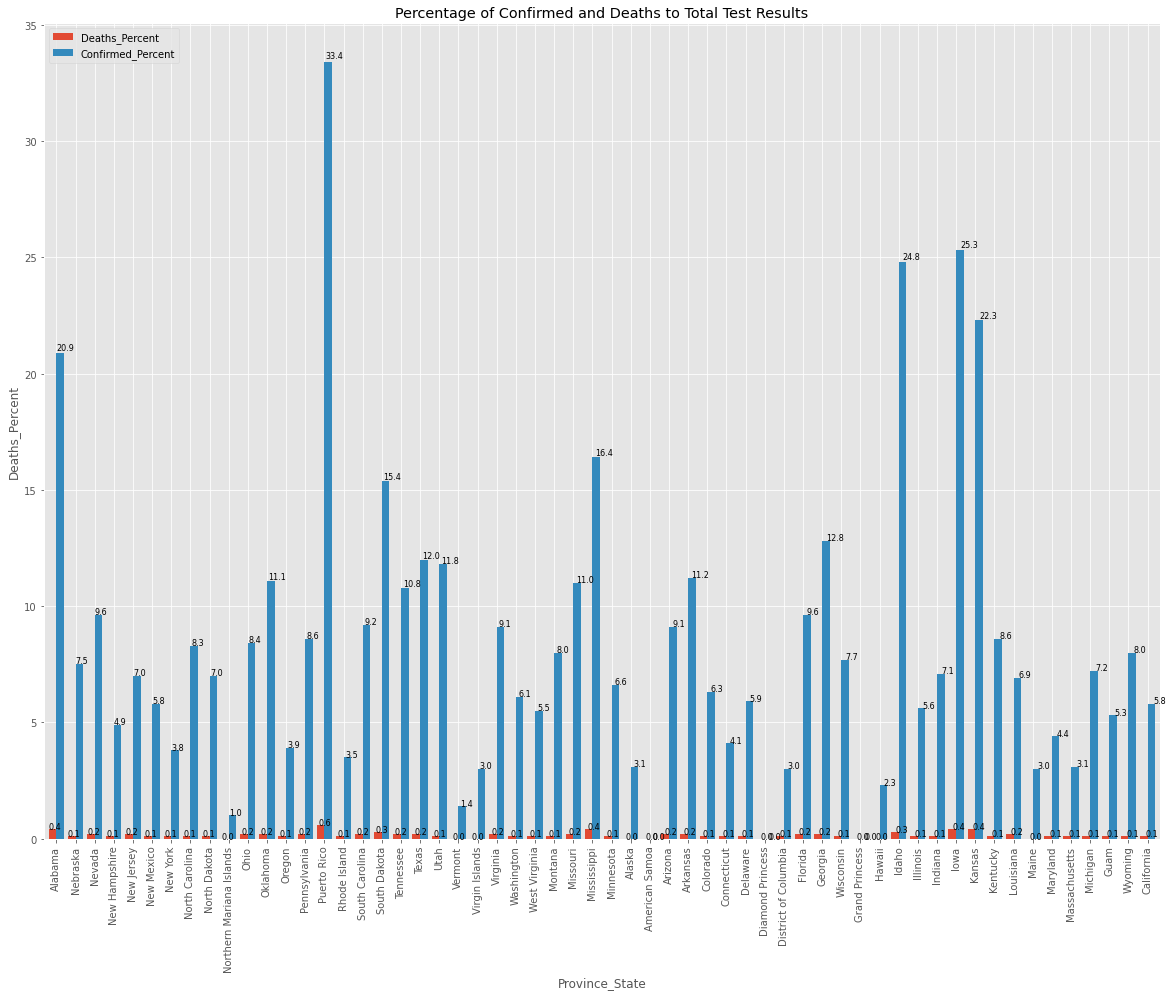

In [14]:
# Plotting deaths and confirmed cases to total test results

style.use('ggplot')
bar_chart = df_percent.plot.bar(stacked=False, width=0.8, figsize=(20,15), title="Percentage of Confirmed and Deaths to Total Test Results")
plt.xlabel('Province_State')
plt.ylabel('Deaths_Percent')
bar_chart.legend(loc=2)  
for p in bar_chart.patches:
    bar_chart.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=8)
plt.show()